In [3]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...


True

In [5]:
oneplus_reviews=[]

In [6]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [7]:
oneplus_reviews = list(set(oneplus_reviews))

In [8]:
txt_upd = ' '.join(oneplus_reviews)

In [9]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() 
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() 
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower()

In [10]:
text_tokens = word_tokenize(txt_upd)

In [11]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [12]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(tokens_without_sw)

In [13]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
df

,aah,absence,absent,absolutely,accepting,accessed,accidental,accuracy,accurate,activate,...,worried,worry,worst,xs,year,years,yellowish,youtube,zoom,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
word_list = ' '.join(df)

In [16]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

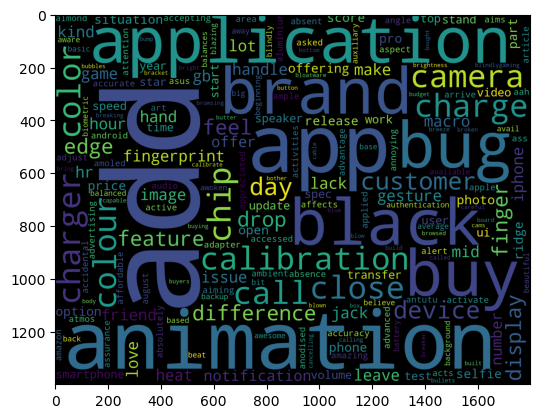

In [17]:
plt.imshow(wordcloud)

### Sentimental Analysis

In [18]:
with open("positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [19]:
positive_words = positive_words[35:]

In [22]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [23]:
negative_words = negative_words[35:]

In [24]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [25]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [26]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [27]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

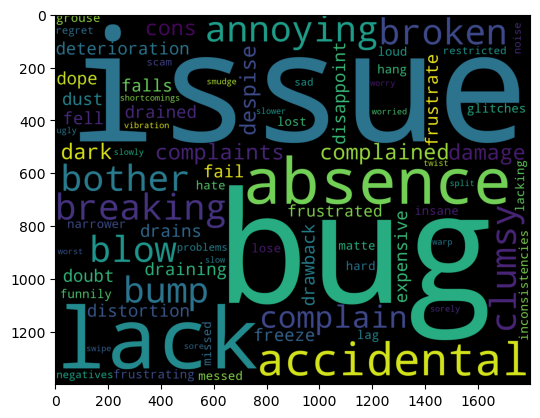

In [28]:
plt.imshow(wordcloud_neg)

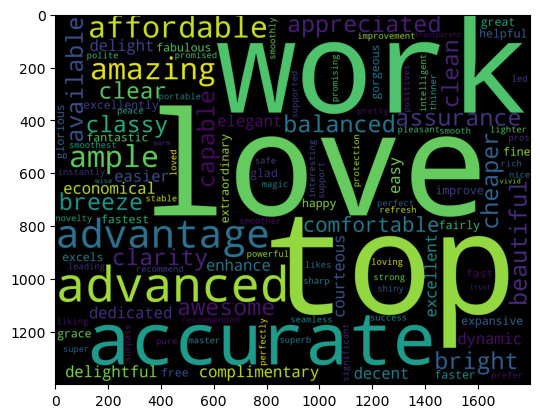

In [29]:
plt.imshow(wordcloud_pos)